## Example 1: Single ODE

##### consider a function psi(x), x belongs to [0,1]
##### and the ode: psi.diff(x,1) = f(x,psi)
##### where f = exp(-x/5)*cos(x) - psi/5

##### psi(x,theta) = A + x*N(x,theta)
##### L(theta) = [(psi.diff(x,1) - f)**2].integrate(x,(0,1))/

In [16]:
import torch
import torch.nn as nn
from time import perf_counter
import matplotlib.pyplot as plt
from functools import partial
import numpy as np
import requests
import os

device = torch.device('cpu')

In [17]:
## Architecture

N = nn.Sequential(nn.Linear(1,50), nn.Sigmoid(), nn.Linear(50,1,bias=False))

# initial condition
A = 0

psi_t = lambda x: A + x*N(x)

f = lambda x, psi: torch.exp(-x/5.0)*torch.cos(x) - psi/5.0

# loss function
def loss(x):
    x.requires_grad = True
    outputs = psi_t(x)
    psi_t_x = torch.autograd.grad(outputs, x,
                grad_outputs = torch.ones_like(outputs),
                create_graph = True)[0]
    
    return torch.mean((psi_t_x - f(x,outputs))**2)

In [18]:
optimizer = torch.optim.LBFGS(N.parameters())

x = torch.Tensor(np.linspace(0,2,100)[:,None])

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

for i in range(10):
    optimizer.step(closure)

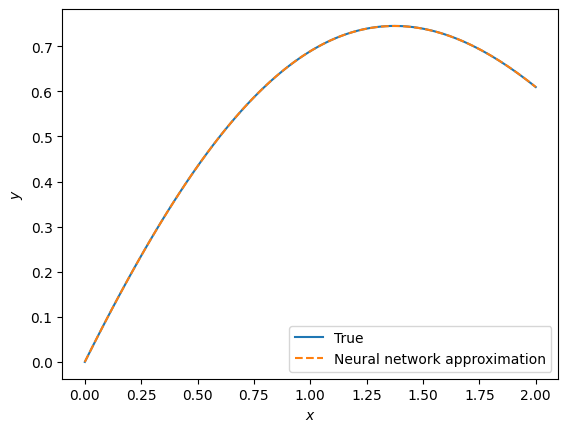

In [19]:
xx = np.linspace(0,2,100)[:,None]

with torch.no_grad():
    yy = psi_t(torch.Tensor(xx)).numpy()

yt = np.exp(-xx/5.0)*np.sin(xx)

fig, ax = plt.subplots(dpi = 100)
ax.plot(xx,yt,label='True')
ax.plot(xx,yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')